Конфигурационная модель (https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.directed_configuration_model.html)

Генерируем рапсределние степеней (in/out):
* in/out - Poisson
* in/out - Степенное

Определить количество петель, мультиребер, двунаправленных связей

In [4]:
import networkx as nx
import numpy as np

In [110]:
import ndlib.models.epidemics as sir
import ndlib.models.ModelConfig as mc
import matplotlib.pyplot as plt

In [2]:
def edges_type(degree_type, graph):
    edges = graph.edges()
    print (f"Edges in graph with {degree_type} degree distribution: ", len(edges))

    bidirected = 0
    self_loops = 0
    multiedges = 0

    for edge in edges:
        if edge[0] == edge[1]:
            self_loops += 1 
        if (edge[1], edge[0]) in edges:
            bidirected += 1

    edges_dict = {}
    for edge in edges:
        if edge in edges_dict:
            edges_dict[edge] += 1
        else:
            edges_dict[edge] = 1
        
    for val in edges_dict.values():
        if val > 1:
            multiedges += 1        
        
    print("Bidirected edges: ", bidirected, "(%f)" % float(bidirected / len(edges)))
    print("Self-loops in graph: ", self_loops, '(%f)' % float(self_loops / len(edges)))
    print("Multi-edges in graph: ", multiedges, "(%f)" % float(multiedges / len(edges)))        

In [113]:
def SIR(graph, N):
    sir_model = sir.SIRModel(graph)

    config = mc.Configuration()
    config.add_model_parameter('beta', 0.005)
    config.add_model_parameter('gamma',0.02)
    config.add_model_parameter("percentage_infected", 0.01)
    sir_model.set_initial_status(config)
    
    iterations = sir_model.iteration_bunch(1000)
    susceptible,infected,recovered = [],[],[]
 
    for iteration in iterations:
        node_count = iteration['node_count']
        susceptible.append(node_count[0]/N)
        infected.append(node_count[1]/N)
        recovered.append(node_count[2]/N)

    plt.figure(figsize = (6,4))
    plt.title('SIR')
    plt.plot(infected,color='r',label='infected')
    plt.plot(susceptible, color='b',label='susceptible')
    plt.plot(recovered, color='k',label='recovered')
    plt.xlabel('time', fontsize = 14)
    plt.ylabel('node/N', fontsize = 14)
    plt.legend()

## In - poisson, out - poisson

Edges in graph with poisson degree distribution:  12118
Bidirected edges:  198 (0.016339)
Self-loops in graph:  14 (0.001155)
Multi-edges in graph:  74 (0.006107)


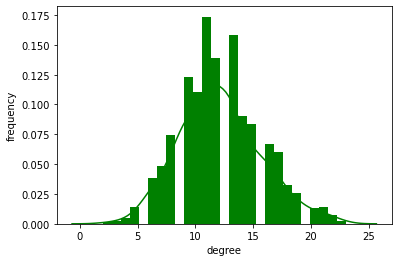

In [93]:
from scipy.stats import poisson
import seaborn as sb

data_binom = poisson.rvs(mu=11.95, size=1000)
ax = sb.distplot(data_binom_final,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel = 'degree', ylabel = 'frequency')

data_binom_final = np.concatenate([data_binom[:150] + 1, data_binom[150:]])
N = len(data_binom_final) #edges number 

in_degree, out_degree = data_binom_final, data_binom_final

graph_poisson = nx.directed_configuration_model(in_degree, out_degree, seed=42)
edges_type('poisson', graph_poisson)

100%|██████████| 1000/1000 [00:04<00:00, 228.59it/s]


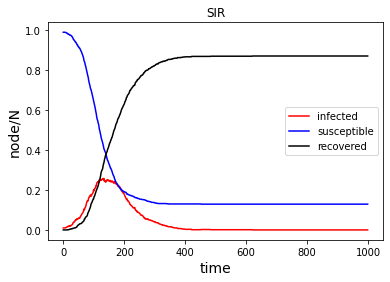

In [114]:
SIR(graph_poisson, N)

In [33]:
#генератор степенного распределения
def power_law(x_min,gamma):
    r=np.random.random()
    return round(x_min*np.float_power((r),1/(-gamma+1))) # обратная к F_cd функция

## In - powerlaw, out - powerlaw

Edges in graph with powerlaw degree distribution:  12118
Bidirected edges:  483 (0.039858)
Self-loops in graph:  22 (0.001815)
Multi-edges in graph:  214 (0.017660)


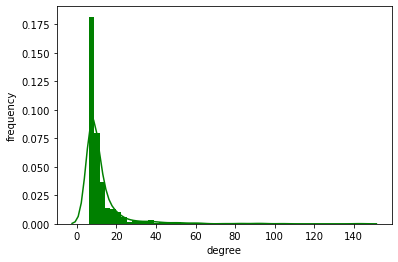

In [51]:
import seaborn as sb

np.random.seed(10)
data_powerlaw = []
x_min, gamma = 6, 3

for i in range(1000):
    data_powerlaw.append(power_law(x_min,gamma))

ax = sb.distplot(data_powerlaw,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel = 'degree', ylabel = 'frequency')

in_degree, out_degree = data_powerlaw, data_powerlaw
#out_degree = new_arr
graph_powerlaw = nx.directed_configuration_model(in_degree, out_degree)
edges_type('powerlaw', graph_powerlaw)

100%|██████████| 1000/1000 [00:04<00:00, 226.87it/s]


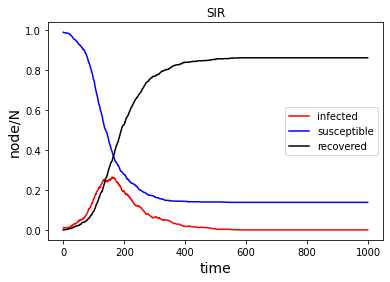

In [117]:
SIR(graph_powerlaw, len(data_powerlaw))

Параметры степенного powerlaw распределения подобраны так, чтобы число ребер и средняя степень вершин совпадали

В графе со степенным распределением in/out степеней доли двунаправленных мультиребер в графах близки

## In - poisson, out - powerlaw

In [96]:
in_degree, out_degree = data_binom_final, data_powerlaw
graph_poisson_powerlaw = nx.directed_configuration_model(in_degree, out_degree)
edges_type('poisson_powerlaw', graph_poisson_powerlaw)

Edges in graph with poisson_powerlaw degree distribution:  12118
Bidirected edges:  157 (0.012956)
Self-loops in graph:  9 (0.000743)
Multi-edges in graph:  120 (0.009903)


100%|██████████| 1000/1000 [00:04<00:00, 221.42it/s]


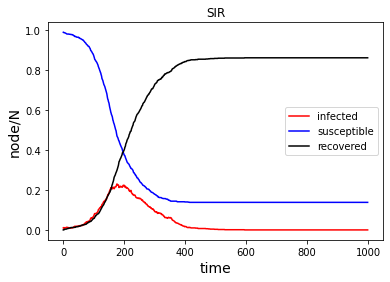

In [116]:
SIR(graph_poisson_powerlaw, len(data_powerlaw))

## In - powerlaw, out - poisson

In [97]:
in_degree, out_degree = data_powerlaw, data_binom_final
graph_powerlaw_poisson = nx.directed_configuration_model(in_degree, out_degree)
edges_type('powerlaw_poisson', graph_powerlaw_poisson)

Edges in graph with powerlaw_poisson degree distribution:  12118
Bidirected edges:  180 (0.014854)
Self-loops in graph:  15 (0.001238)
Multi-edges in graph:  134 (0.011058)


In [ ]:
SIR(graph_poisson_powerlaw, len(data_powerlaw))